<img width=100% src="https://capsule-render.vercel.app/api?type=rect&height=50&color=gradient&section=header&reversal=false">

## state of data

Uma novidade dessa edição da pesquisa foram perguntas com a intenção de medir o uso de tecnologias de AI Generativa e LLM's pelas empresas e seus profissionais. A amostra reflete a visão de variados papéis de atuação em empresas, como os de *analista de dados*, *cientista de dados* e *engenheiro de dados*, bem como diferentes perfis de experiência profissional, incluindo analistas júnior, pleno, sênior e gestores.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import altair as alt

In [2]:
data = pd.read_csv('dados/State_of_data.csv')

In [3]:
data.shape

(5293, 399)

In [4]:
data.head()

,"('P0', 'id')","('P1_a ', 'Idade')","('P1_a_1 ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_c ', 'Cor/raca/etnia')","('P1_d ', 'PCD')","('P1_e ', 'experiencia_profissional_prejudicada')","('P1_e_1 ', 'Não acredito que minha experiência profissional seja afetada')","('P1_e_2 ', 'Experiencia prejudicada devido a minha Cor Raça Etnia')","('P1_e_3 ', 'Experiencia prejudicada devido a minha identidade de gênero')",...,"('P8_d_3 ', 'Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.')","('P8_d_4 ', 'Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).')","('P8_d_5 ', 'Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.')","('P8_d_6 ', 'Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.')","('P8_d_7 ', 'Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.')","('P8_d_8 ', 'Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.')","('P8_d_9 ', 'Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.')","('P8_d_10 ', 'Criando e gerenciando soluções de Feature Store e cultura de MLOps.')","('P8_d_11 ', 'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')","('P8_d_12 ', 'Treinando e aplicando LLM's para solucionar problemas de negócio.')"
0,001b2d1qtli8t9z7oqgdhj001b2d4i0g,31,30-34,Masculino,Branca,Não,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0026aa3fwd78u0026asg7456tfkjg2cs,30,30-34,Masculino,Branca,Não,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00r21rb9pusd1b0v7ew00r21rw3dy69w,37,35-39,Feminino,Amarela,Não,"Sim, acredito que a minha a experiência profis...",0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00urm3jf2cek12w6ygue00urm3jzd17j,22,22-24,Masculino,Preta,Não,Não acredito que minha experiência profissiona...,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00v0az4g792svil00vn6y1kfm9hq8vy9,34,30-34,Masculino,Branca,Não,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
import re
# removendo nomes com p0,p1,...
def limpar_coluna(col):
    match = re.search(r"'[^']*'\s*,\s*'([^']*)'", col)
    return match.group(1).strip() if match else col.strip()

data.columns = [limpar_coluna(col) for col in data.columns]


## analise exploratoria

In [6]:
data['Idade'].isnull().sum()

np.int64(0)

### aplicando tecnica PCA

In [7]:
# verificando as colunas numericas e nao numericas
numeric_cols = data.select_dtypes(include=[np.number]).columns
non_numeric_cols = data.select_dtypes(exclude=[np.number]).columns

print("\nNúmero de colunas numéricas:", len(numeric_cols))
print("Número de colunas não numéricas:", len(non_numeric_cols))


Número de colunas numéricas: 330
Número de colunas não numéricas: 69


In [27]:
# verificando colunas repitidas ou nao
print("\nNúmero de colunas únicas:", len(set(data.columns)))
print("Número de colunas com nomes duplicados:", len(data.columns) - len(set(data.columns)))


Número de colunas únicas: 354
Número de colunas com nomes duplicados: 45


In [10]:
numeric_columns = data.select_dtypes(include=[np.number]).columns
data_numeric = data[numeric_columns]


In [11]:
# Removendo colunas com muitos valores nulos
data_numeric = data_numeric.dropna(axis=1, thresh=0.7*len(data_numeric))

In [12]:
# Imputando valores nulos restantes com a média
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data_numeric)

In [13]:
# Padronizando os dados
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

In [14]:
# Aplicando PCA
pca = PCA()
pca_result = pca.fit_transform(data_scaled)

In [15]:
# Criando DataFrame com os resultados do PCA
pca_df = pd.DataFrame(
    data=pca_result,
    columns=[f'PC{i+1}' for i in range(pca_result.shape[1])]
)

In [16]:
# Calculando a variância explicada
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

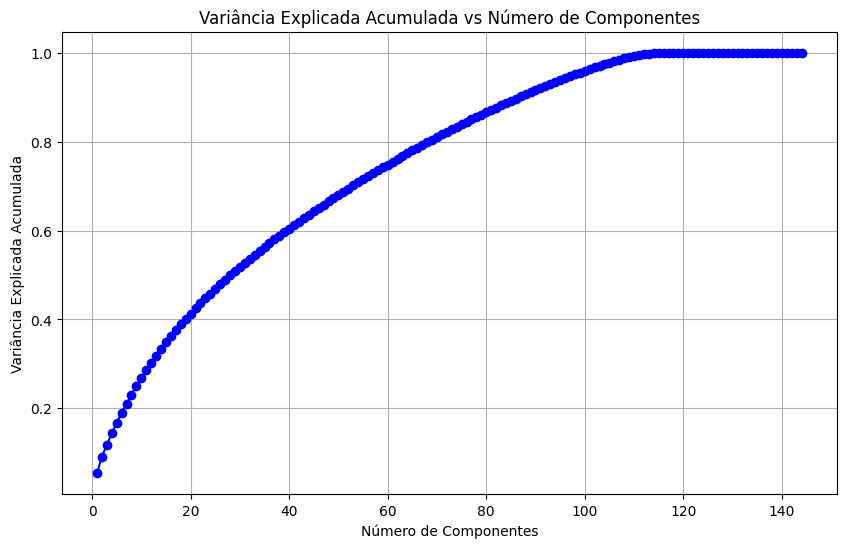

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, 'bo-')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Variância Explicada Acumulada vs Número de Componentes')
plt.grid(True)
plt.savefig('variancia_explicada.png')
plt.show()
plt.close()

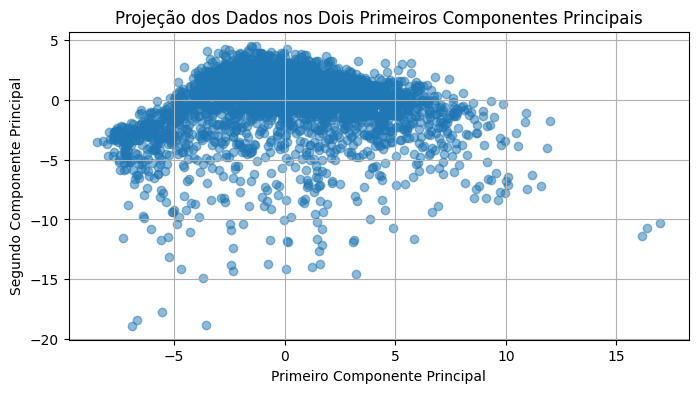

In [18]:
plt.figure(figsize=(8, 4))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.xlabel('Primeiro Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.title('Projeção dos Dados nos Dois Primeiros Componentes Principais')
plt.grid(True)
plt.savefig('pca_projecao.png')
plt.show()
plt.close()

In [19]:
feature_importance = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca_result.shape[1])],
    index=data_numeric.columns
)

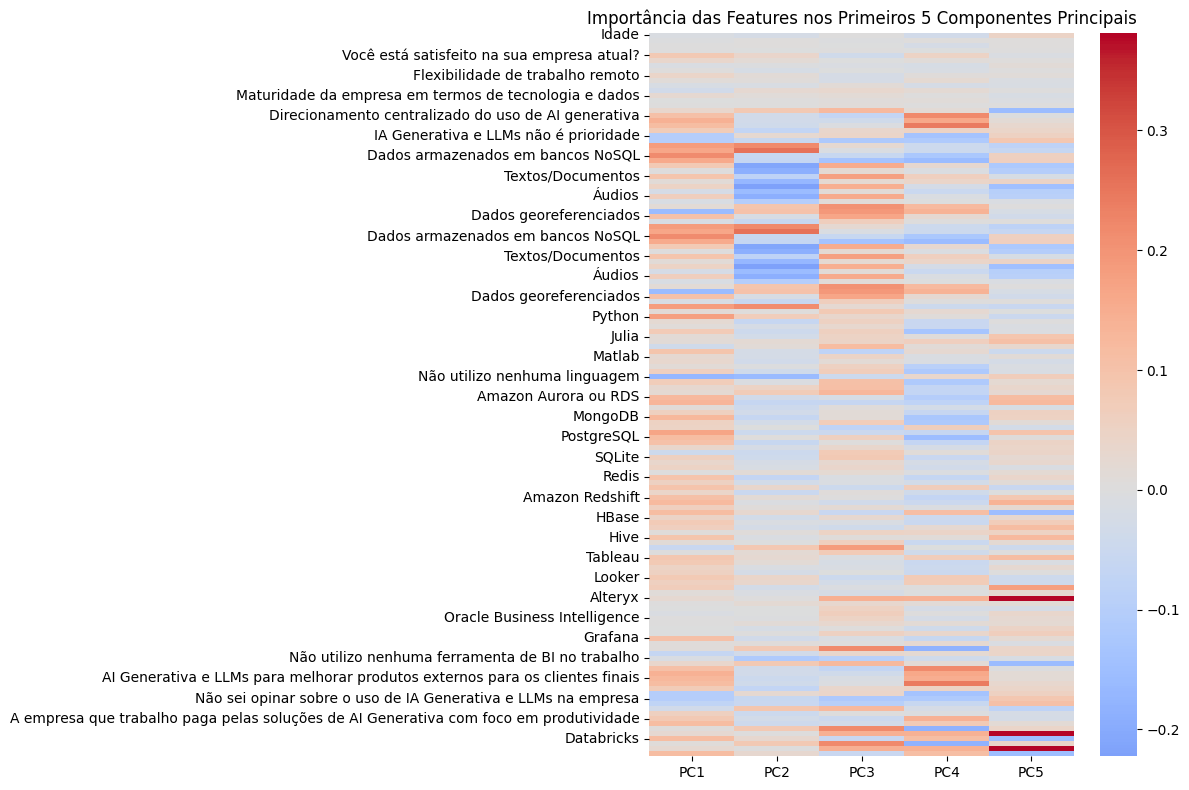

In [20]:
plt.figure(figsize=(12, 8))
sns.heatmap(feature_importance.iloc[:, :5], cmap='coolwarm', center=0)
plt.title('Importância das Features nos Primeiros 5 Componentes Principais')
plt.tight_layout()
plt.show()
plt.savefig('feature_importance.png')
plt.close()

In [21]:
# Imprimindo informações sobre a redução de dimensionalidade
print(f"\nNúmero final de features: {data_numeric.shape[1]}")
print(f"Variância explicada pelos primeiros 5 componentes: {sum(explained_variance[:5]):.2%}")
print("\nTop 5 features mais importantes para cada componente principal:")
for i in range(5):
    print(f"\nPC{i+1}:")
    top_features = feature_importance[f'PC{i+1}'].abs().nlargest(5)
    for feature, importance in top_features.items():
        print(f"{feature}: {importance:.4f}") 


Número final de features: 144
Variância explicada pelos primeiros 5 componentes: 16.71%

Top 5 features mais importantes para cada componente principal:

PC1:
Dados armazenados em bancos NoSQL: 0.2156
Dados armazenados em bancos NoSQL: 0.2156
Dados relacionais (estruturados em bancos SQL): 0.1874
Dados relacionais (estruturados em bancos SQL): 0.1874
SQL: 0.1821

PC2:
Dados relacionais (estruturados em bancos SQL): 0.2566
Dados relacionais (estruturados em bancos SQL): 0.2566
Vídeos: 0.2224
Vídeos: 0.2224
Dados relacionais (estruturados em bancos SQL): 0.2176

PC3:
Pentaho: 0.2168
Pentaho: 0.2168
Pentaho: 0.2168
Planilhas: 0.2036
Planilhas: 0.2036

PC4:
AI Generativa e LLMs para melhorar produtos internos para os colaboradores: 0.2425
AI Generativa e LLMs para melhorar produtos internos para os colaboradores: 0.2425
Direcionamento centralizado do uso de AI generativa: 0.2173
Direcionamento centralizado do uso de AI generativa: 0.2173
Pentaho: 0.1840

PC5:
Alteryx: 0.3815
Alteryx: 0.38

# =========================================

In [41]:
# Verificando os dados antes da análise
print("\nVerificação dos Dados:")
print("-" * 50)

# Verificando as colunas disponíveis
print("\nColunas disponíveis no DataFrame:")
print(data.columns.tolist())

# Verificando os valores únicos em cada coluna relevante
print("\nValores únicos em 'Cargo Atual':")
print(data['Cargo Atual'].unique())

print("\nValores únicos em 'Genero':")
print(data['Genero'].unique())

print("\nValores únicos em 'Cor/raca/etnia':")
print(data['Cor/raca/etnia'].unique())

# Verificando a distribuição de idade
print("\nEstatísticas básicas da idade:")
print(data['Idade'].describe())

# Verificando valores nulos
print("\nValores nulos em cada coluna relevante:")
print(data[['Idade', 'Genero', 'Cor/raca/etnia', 'Cargo Atual']].isnull().sum())

# Criando um DataFrame de teste com os dados
df_teste = data[['Idade', 'Genero', 'Cor/raca/etnia', 'Cargo Atual']].copy()

# Verificando se há dados após o filtro
cargos_interesse = ['Cientista de Dados', 'Engenheiro de Dados', 'Analista de Dados']
df_filtrado = df_teste[df_teste['Cargo Atual'].isin(cargos_interesse)]

print("\nNúmero de registros após filtrar por cargos de interesse:")
print(df_filtrado.shape)

# Verificando a distribuição dos cargos
print("\nDistribuição dos cargos:")
print(df_filtrado['Cargo Atual'].value_counts())

# Verificando a distribuição por gênero
print("\nDistribuição por gênero:")
print(df_filtrado['Genero'].value_counts())

# Verificando a distribuição por etnia
print("\nDistribuição por etnia:")
print(df_filtrado['Cor/raca/etnia'].value_counts())


Verificação dos Dados:
--------------------------------------------------

Colunas disponíveis no DataFrame:
['id', 'Idade', 'Faixa idade', 'Genero', 'Cor/raca/etnia', 'PCD', 'experiencia_profissional_prejudicada', 'Não acredito que minha experiência profissional seja afetada', 'Experiencia prejudicada devido a minha Cor Raça Etnia', 'Experiencia prejudicada devido a minha identidade de gênero', 'Experiencia prejudicada devido ao fato de ser PCD', 'aspectos_prejudicados', 'Quantidade de oportunidades de emprego/vagas recebidas', 'Senioridade das vagas recebidas em relação à sua experiência', 'Aprovação em processos seletivos/entrevistas', 'Oportunidades de progressão de carreira', 'Velocidade de progressão de carreira', 'Nível de cobrança no trabalho/Stress no trabalho', 'Atenção dada diante das minhas opiniões e ideias', 'Relação com outros membros da empresa, em momentos de trabalho', 'Relação com outros membros da empresa, em momentos de integração e outros momentos fora do trabalh


Verificação dos dados antes da análise:
Total de registros: 5293
Registros por cargo:
Cargo Atual
Analista de Dados/Data Analyst                                         907
Cientista de Dados/Data Scientist                                      687
Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect    684
Analista de BI/BI Analyst                                              506
Outra Opção                                                            262
Analista de Negócios/Business Analyst                                  195
Analytics Engineer                                                     139
Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas            105
Data Product Manager/ Product Manager (PM/APM/DPM/GPM/PO)               81
Engenheiro de Machine Learning/ML Engineer/AI Engineer                  75
Analista de Suporte/Analista Técnico                                    72
Analista de Inteligência de Mercado/Market Intelligence                 39
O

C:\Users\ottos\AppData\Local\Temp\ipykernel_21512\919328714.py:56: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


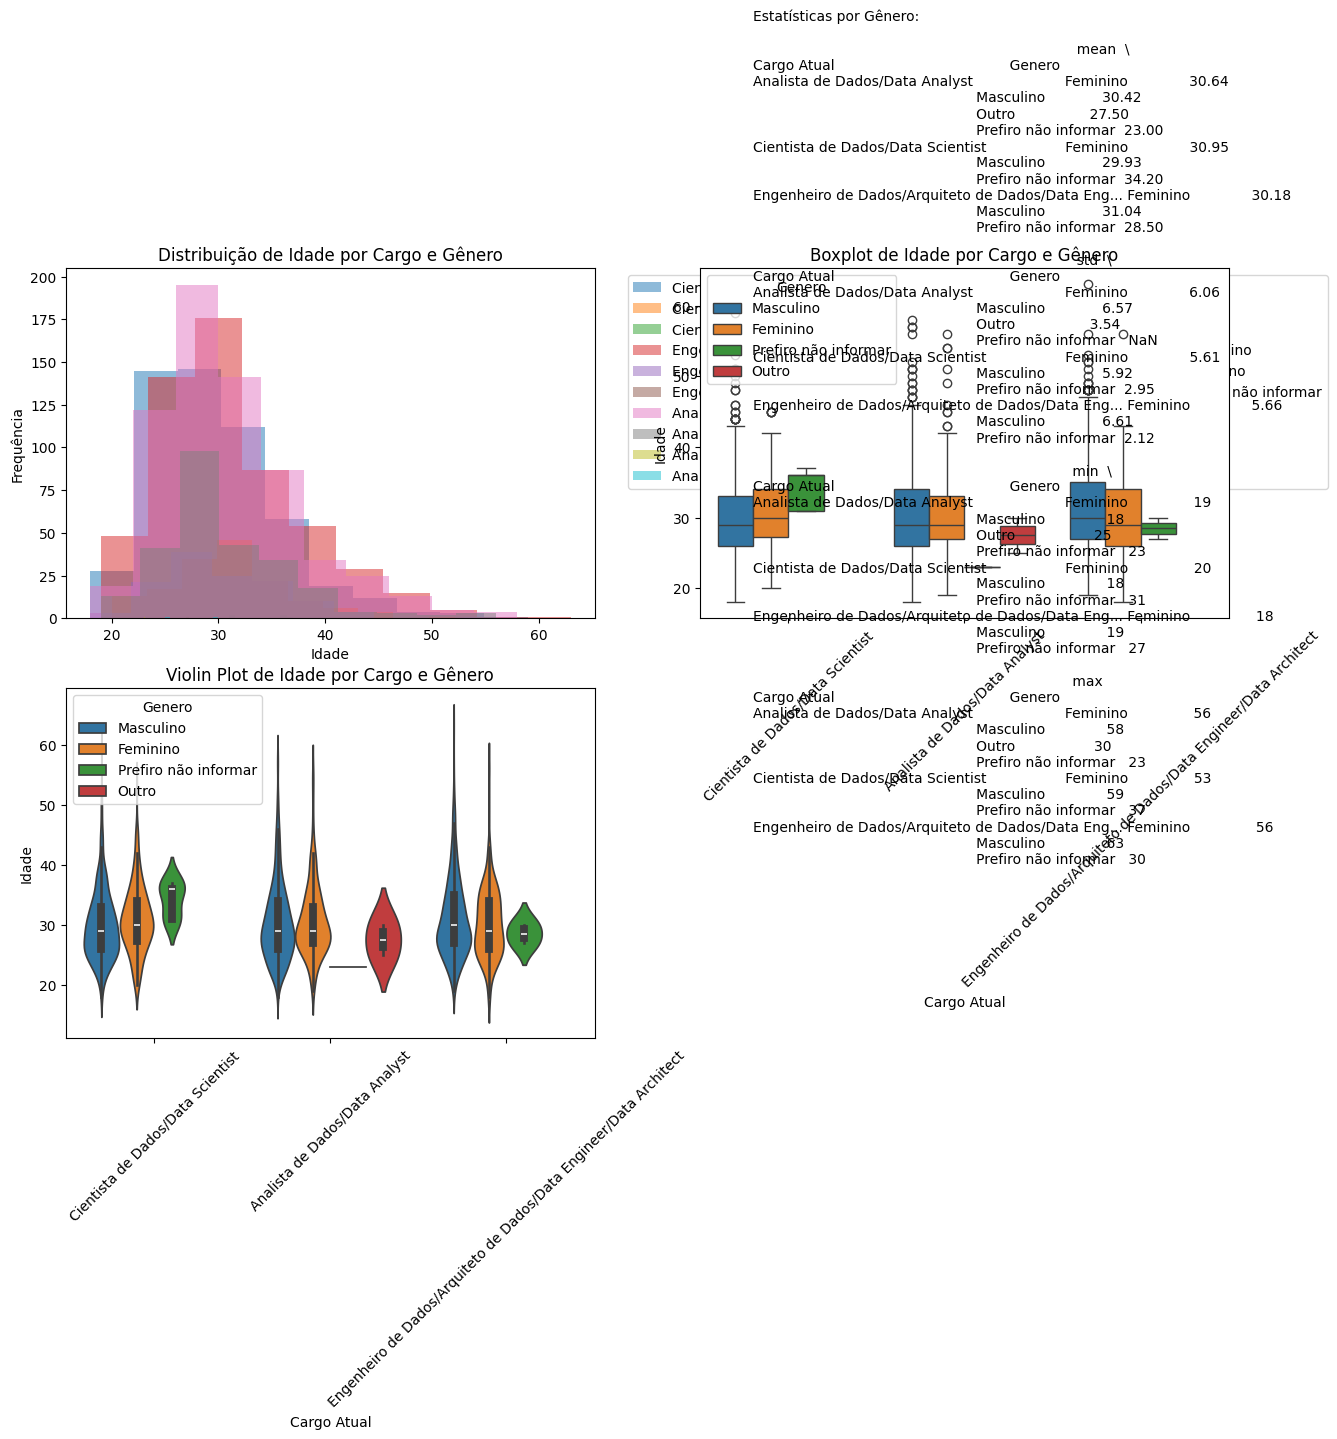

C:\Users\ottos\AppData\Local\Temp\ipykernel_21512\919328714.py:94: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


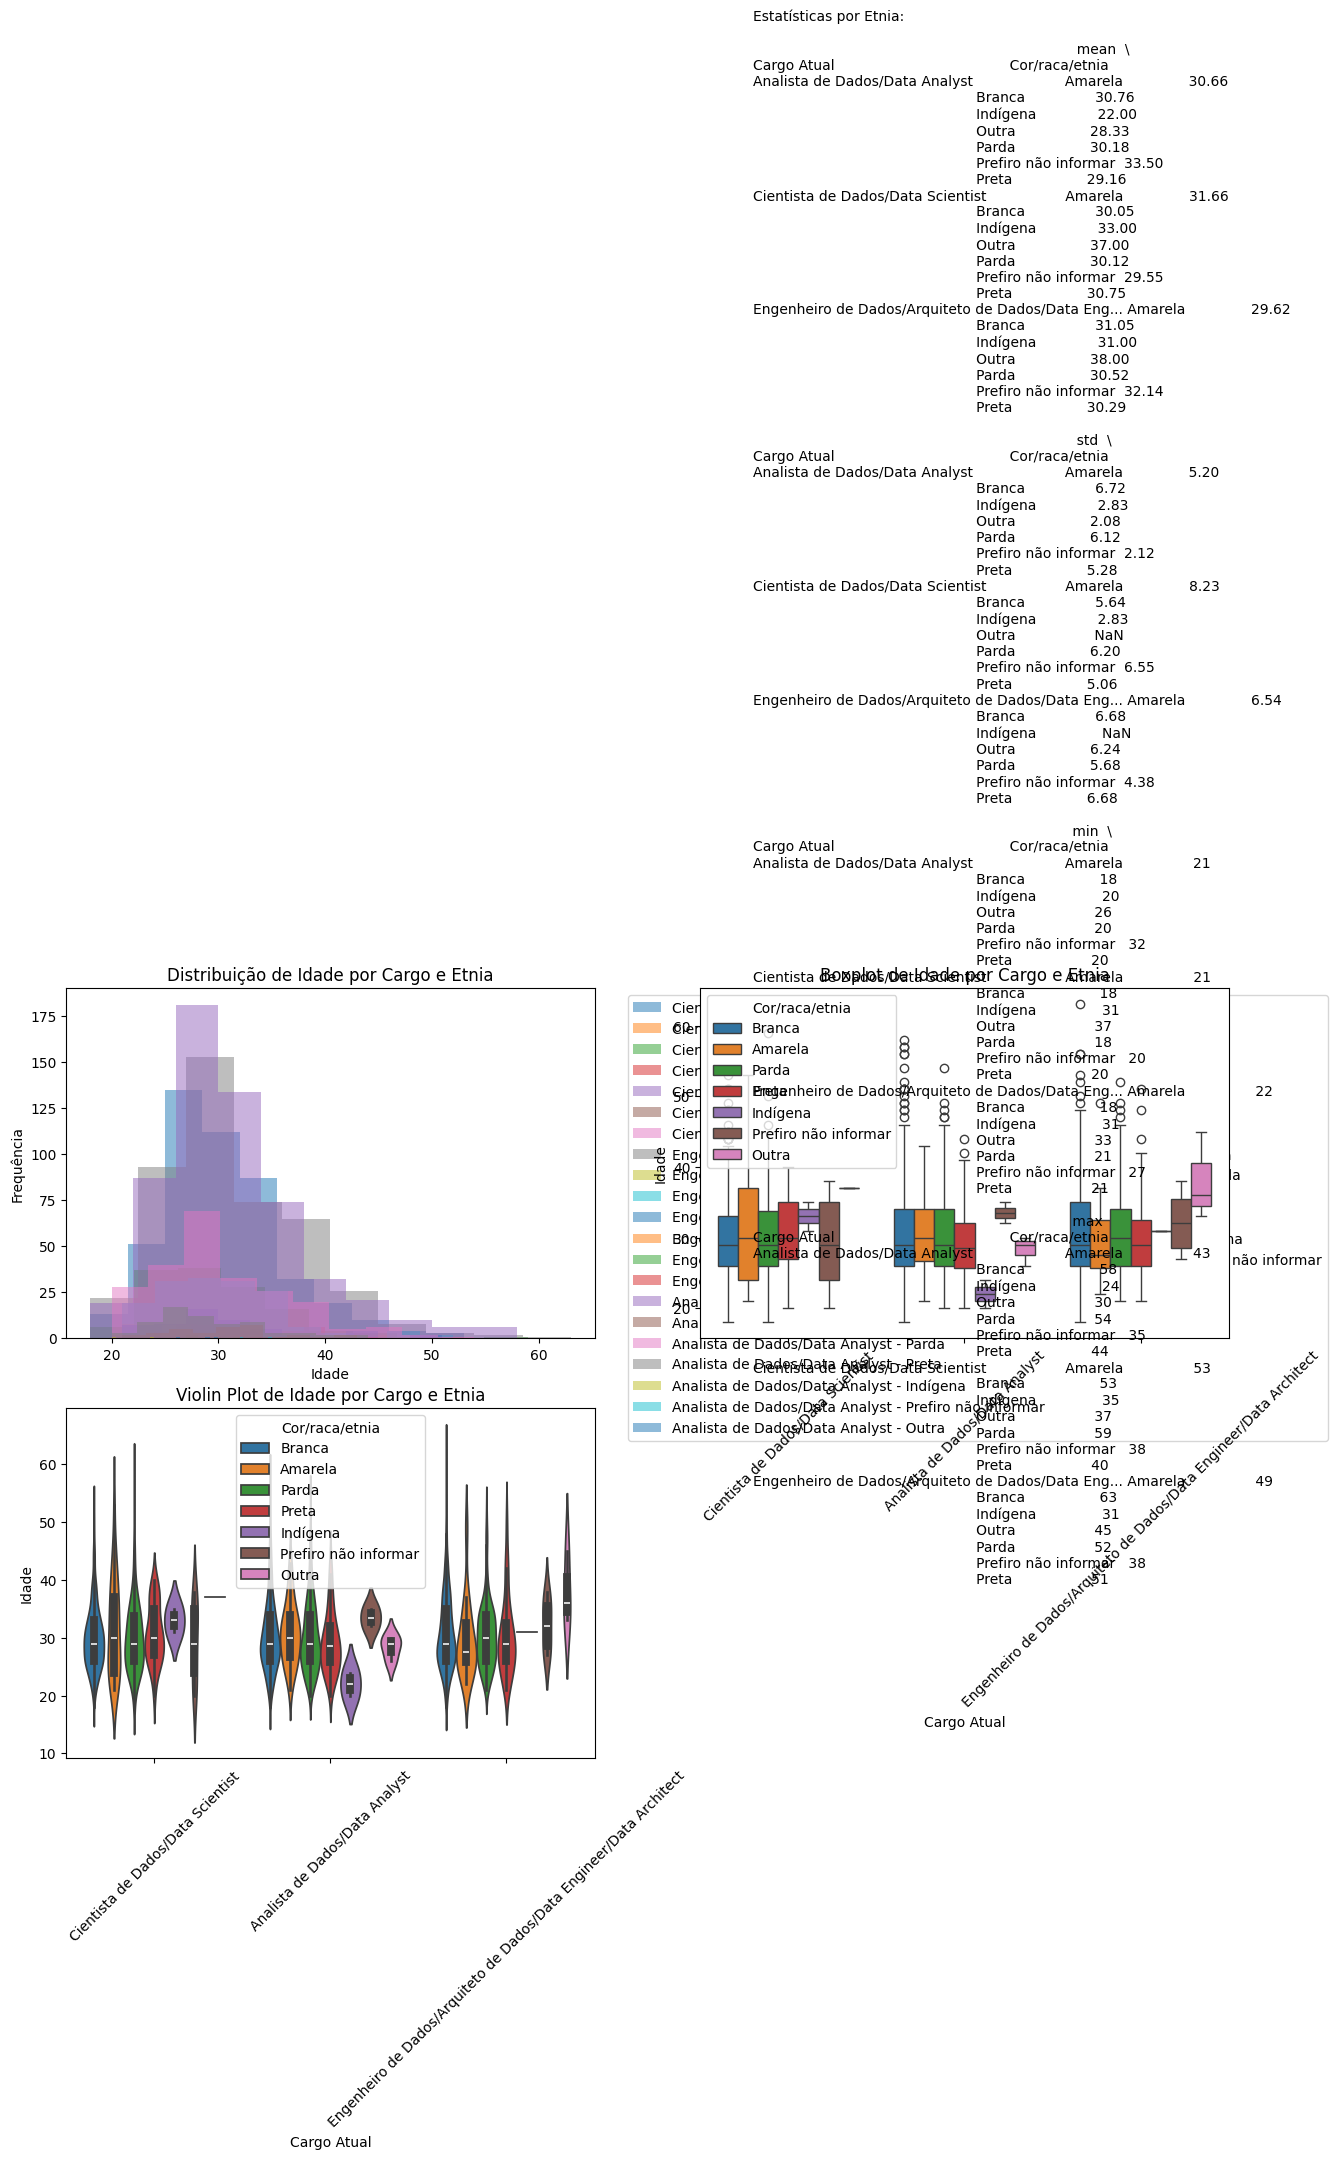


Estatísticas Detalhadas por Gênero:
                                                                          mean  \
Cargo Atual                                        Genero                        
Analista de Dados/Data Analyst                     Feminino              30.64   
                                                   Masculino             30.42   
                                                   Outro                 27.50   
                                                   Prefiro não informar  23.00   
Cientista de Dados/Data Scientist                  Feminino              30.95   
                                                   Masculino             29.93   
                                                   Prefiro não informar  34.20   
Engenheiro de Dados/Arquiteto de Dados/Data Eng... Feminino              30.18   
                                                   Masculino             31.04   
                                                   Prefiro nã

In [42]:
cargos_interesse = [
    'Cientista de Dados/Data Scientist',
    'Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect',
    'Analista de Dados/Data Analyst'
]

# Criando DataFrame para análise
df_analise = data[['Idade', 'Genero', 'Cor/raca/etnia', 'Cargo Atual']].copy()

# Verificando dados antes da análise
print("\nVerificação dos dados antes da análise:")
print(f"Total de registros: {len(df_analise)}")
print(f"Registros por cargo:")
print(df_analise['Cargo Atual'].value_counts())

# Filtrando apenas os cargos de interesse
df_filtrado = df_analise[df_analise['Cargo Atual'].isin(cargos_interesse)]

print(f"\nRegistros após filtro: {len(df_filtrado)}")
print(f"Registros por cargo após filtro:")
print(df_filtrado['Cargo Atual'].value_counts())

# Criando visualizações
plt.figure(figsize=(15, 10))

# 1. Histograma por Gênero
plt.subplot(2, 2, 1)
for cargo in cargos_interesse:
    for genero in df_filtrado['Genero'].unique():
        subset = df_filtrado[(df_filtrado['Cargo Atual'] == cargo) & (df_filtrado['Genero'] == genero)]
        if len(subset) > 0:  # Só plota se houver dados
            plt.hist(subset['Idade'], alpha=0.5, label=f'{cargo} - {genero}')
plt.title('Distribuição de Idade por Cargo e Gênero')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 2. Boxplot por Gênero
plt.subplot(2, 2, 2)
sns.boxplot(data=df_filtrado, x='Cargo Atual', y='Idade', hue='Genero')
plt.title('Boxplot de Idade por Cargo e Gênero')
plt.xticks(rotation=45)

# 3. Violin Plot por Gênero
plt.subplot(2, 2, 3)
sns.violinplot(data=df_filtrado, x='Cargo Atual', y='Idade', hue='Genero')
plt.title('Violin Plot de Idade por Cargo e Gênero')
plt.xticks(rotation=45)

# 4. Estatísticas por Gênero
plt.subplot(2, 2, 4)
stats_genero = df_filtrado.groupby(['Cargo Atual', 'Genero'])['Idade'].agg(['mean', 'std', 'min', 'max']).round(2)
plt.text(0.1, 0.5, f'Estatísticas por Gênero:\n\n{stats_genero}', fontsize=10)
plt.axis('off')

plt.tight_layout()
plt.savefig('distribuicao_etaria_genero.png')
plt.show()
plt.close()

# Análise por Etnia
plt.figure(figsize=(15, 10))

# 1. Histograma por Etnia
plt.subplot(2, 2, 1)
for cargo in cargos_interesse:
    for etnia in df_filtrado['Cor/raca/etnia'].unique():
        subset = df_filtrado[(df_filtrado['Cargo Atual'] == cargo) & (df_filtrado['Cor/raca/etnia'] == etnia)]
        if len(subset) > 0:  # Só plota se houver dados
            plt.hist(subset['Idade'], alpha=0.5, label=f'{cargo} - {etnia}')
plt.title('Distribuição de Idade por Cargo e Etnia')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 2. Boxplot por Etnia
plt.subplot(2, 2, 2)
sns.boxplot(data=df_filtrado, x='Cargo Atual', y='Idade', hue='Cor/raca/etnia')
plt.title('Boxplot de Idade por Cargo e Etnia')
plt.xticks(rotation=45)

# 3. Violin Plot por Etnia
plt.subplot(2, 2, 3)
sns.violinplot(data=df_filtrado, x='Cargo Atual', y='Idade', hue='Cor/raca/etnia')
plt.title('Violin Plot de Idade por Cargo e Etnia')
plt.xticks(rotation=45)

# 4. Estatísticas por Etnia
plt.subplot(2, 2, 4)
stats_etnia = df_filtrado.groupby(['Cargo Atual', 'Cor/raca/etnia'])['Idade'].agg(['mean', 'std', 'min', 'max']).round(2)
plt.text(0.1, 0.5, f'Estatísticas por Etnia:\n\n{stats_etnia}', fontsize=10)
plt.axis('off')

plt.tight_layout()
plt.savefig('distribuicao_etaria_etnia.png')
plt.show()
plt.close()

# Imprimindo estatísticas detalhadas
print("\nEstatísticas Detalhadas por Gênero:")
print(stats_genero)
print("\nEstatísticas Detalhadas por Etnia:")
print(stats_etnia)